In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

In [216]:
data = pd.read_csv('seeds.csv')
df = data.head(170)
predictors = df.iloc[:,:6]
target = df['Class']
target_names = ['first', 'second', 'third']
df

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
165,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,3
166,12.44,13.59,0.8462,5.319,2.897,4.924,5.270,3
167,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,3
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3


In [192]:
datanus = df.drop(['KernelGrov_Length'], axis=1)
scaler = preprocessing.MinMaxScaler()
datanus = pd.DataFrame(scaler.fit_transform(datanus), columns = datanus.columns)
datanus

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,Class
0,0.430221,0.478355,0.570780,0.485618,0.479422,0.232205,0.0
1,0.393648,0.419913,0.662432,0.367738,0.494585,0.040336,0.0
2,0.336862,0.316017,0.879310,0.219402,0.497473,0.308442,0.0
3,0.293551,0.283550,0.793103,0.238015,0.527798,0.238265,0.0
4,0.514918,0.510823,0.864791,0.426396,0.659928,0.094084,0.0
...,...,...,...,...,...,...,...
165,0.126083,0.112554,0.646098,0.114495,0.211552,0.229015,1.0
166,0.158807,0.207792,0.345735,0.235195,0.179783,0.663312,1.0
167,0.130895,0.177489,0.328494,0.290468,0.136462,0.458205,1.0
168,0.053898,0.106061,0.190563,0.154540,0.014440,0.569690,1.0


(array([70.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

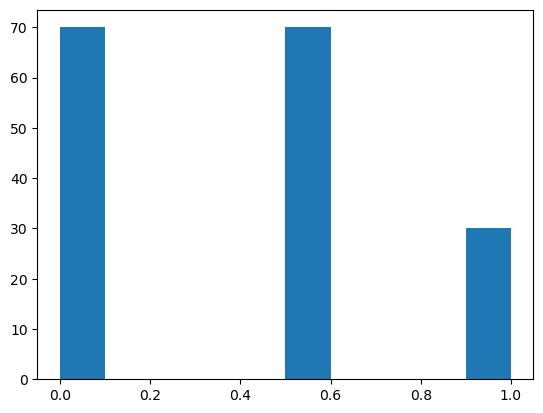

In [193]:
plt.hist(datanus['Class'])

In [194]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, 
                                                    shuffle = True, random_state=322)
print(
    'Размер признака обучающей выборки', x_train.shape, '\n',
    'Размер признака тестовой выборки', x_test.shape, '\n',
    'Размер для целевого показателя обучающей выборки', y_train.shape, '\n',
    'Размер для показателя тестовой выборки', y_test.shape, '\n')

Размер признака обучающей выборки (136, 6) 
 Размер признака тестовой выборки (34, 6) 
 Размер для целевого показателя обучающей выборки (136,) 
 Размер для показателя тестовой выборки (34,) 



In [195]:
timer = time.time()

model = LogisticRegression(random_state = 322)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(" %s seconds" % (time.time() - timer))
print('Предсказанные значения \n',y_predict)
print('Исходные значения \n', np.array(y_test))

 0.02045297622680664 seconds
Предсказанные значения 
 [2 1 2 2 1 2 3 2 1 1 1 1 1 2 2 1 2 1 1 3 1 3 2 1 2 2 1 2 2 2 3 3 2 1]
Исходные значения 
 [2 1 2 2 1 2 3 2 1 2 1 1 1 2 2 1 2 1 1 3 1 3 2 1 2 2 1 2 2 2 3 3 2 2]


C:\Users\ivkub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [196]:
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [197]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.94        17
           3       1.00      1.00      1.00         5

    accuracy                           0.94        34
   macro avg       0.95      0.96      0.95        34
weighted avg       0.95      0.94      0.94        34



In [207]:
timer = time.time()

param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)
best_model = grid_search_svm.best_estimator_

print(" %s seconds" % (time.time() - timer))

best_model.kernel

 0.04849696159362793 seconds


'linear'

In [208]:
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [219]:
svm_preds = best_model.predict(x_test)

In [220]:
print(classification_report(svm_preds, y_test))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.94        15
           3       1.00      1.00      1.00         5

    accuracy                           0.94        34
   macro avg       0.96      0.95      0.95        34
weighted avg       0.95      0.94      0.94        34



In [210]:
timer = time.time()
number_of_neighbors = np.arange(2, 7, 15)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)
grid_search.fit(x_train, y_train)

print(" %s seconds" % (time.time() - timer))

grid_search.best_score_

 0.016742229461669922 seconds


C:\Users\ivkub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\ivkub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

0.8896574440052701

In [211]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [223]:
fig = px.imshow(confusion_matrix(y_test, knn_predict), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [221]:
knn_preds = grid_search.predict(x_test)
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        18
           2       0.82      1.00      0.90        14
           3       0.40      1.00      0.57         2

    accuracy                           0.82        34
   macro avg       0.74      0.89      0.76        34
weighted avg       0.89      0.82      0.83        34



C:\Users\ivkub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

